Train directory: C:\Users\BHAVESH K\OneDrive\Desktop\sustain\cropdiseases1\train1
Validation directory: C:\Users\BHAVESH K\OneDrive\Desktop\sustain\cropdiseases1\valid1
Test directory: C:\Users\BHAVESH K\OneDrive\Desktop\sustain\cropdiseases1\test1
Found 20412 images belonging to 11 classes.
Found 5103 images belonging to 11 classes.
Found 33 images belonging to 1 classes.


c:\Users\BHAVESH K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,458,251 (13.19 MB)

 Trainable params: 3,458,251 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2


c:\Users\BHAVESH K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


637/637 ━━━━━━━━━━━━━━━━━━━━ 670s 1s/step - accuracy: 0.4429 - loss: 1.5204 - val_accuracy: 0.7091 - val_loss: 0.9490
Epoch 2/2
637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.9375 - loss: 0.2620 - val_accuracy: 0.6667 - val_loss: 0.9653


c:\Users\BHAVESH K\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0312 - loss: 134.5776
Test Accuracy: 0.03
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


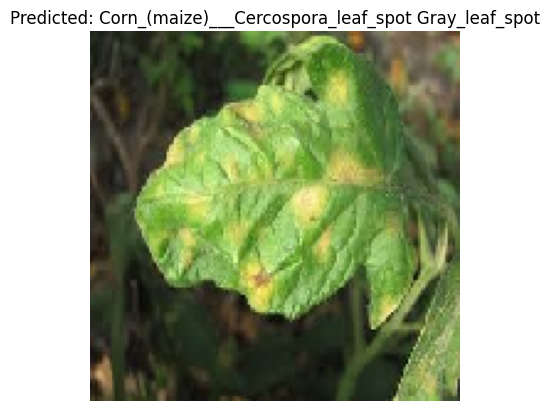

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define paths
base_dir = r'C:\Users\BHAVESH K\OneDrive\Desktop\sustain\cropdiseases1'
train_dir = os.path.join(base_dir, 'train1')
validation_dir = os.path.join(base_dir, 'valid1')
test_dir = os.path.join(base_dir, 'test1')

print("Train directory:", train_dir)
print("Validation directory:", validation_dir)
print("Test directory:", test_dir)

# Image data generator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # number of classes
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.2f}")

# Function to predict and visualize results
def predict_and_visualize(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    class_indices = train_generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}
    
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')  # Hide axis
    plt.show()

# Test the function
sample_image_path = r'C:\Users\BHAVESH K\OneDrive\Desktop\sustain\c.jpeg'  # Replace with an actual image path
predict_and_visualize(sample_image_path, model)
# Save the model
model.save('savemodel.keras')

